# Presidential Job Approval Polls

In [2]:
library(readxl)
data <- read_excel("C:/Users/Julian/Downloads/American Presidency Project - Approval Ratings for POTUS.xlsx",
                  sheet = 1)
head(data)

Warning message:
"package 'readxl' was built under R version 3.6.2"


start_date,end_date,approving,disapproving,unsure_nodata,president,Inauguration_both,inauguration,days_in_office
<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<dbl>
2020-01-16,2020-01-29,49,50,1,Donald Trump,2017-01-20,2017-01-20,1104
2020-01-02,2020-01-15,44,53,3,Donald Trump,2017-01-20,2017-01-20,1090
2019-12-02,2019-12-15,45,51,4,Donald Trump,2017-01-20,2017-01-20,1059
2019-11-01,2019-11-14,43,54,3,Donald Trump,2017-01-20,2017-01-20,1028
2019-10-14,2019-10-31,41,57,2,Donald Trump,2017-01-20,2017-01-20,1014
2019-10-01,2019-10-13,39,57,4,Donald Trump,2017-01-20,2017-01-20,996


## Trump approval

In [3]:
library(dplyr)
library(tidyr)
approval_trump <- data  %>% 
    select(president, end_date, approving)  %>% 
    filter(president == "Donald Trump") 
head(approval_trump)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 3.6.3"


president,end_date,approving
<chr>,<dttm>,<dbl>
Donald Trump,2020-01-29,49
Donald Trump,2020-01-15,44
Donald Trump,2019-12-15,45
Donald Trump,2019-11-14,43
Donald Trump,2019-10-31,41
Donald Trump,2019-10-13,39


Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"Removed 9 row(s) containing missing values (geom_path)."


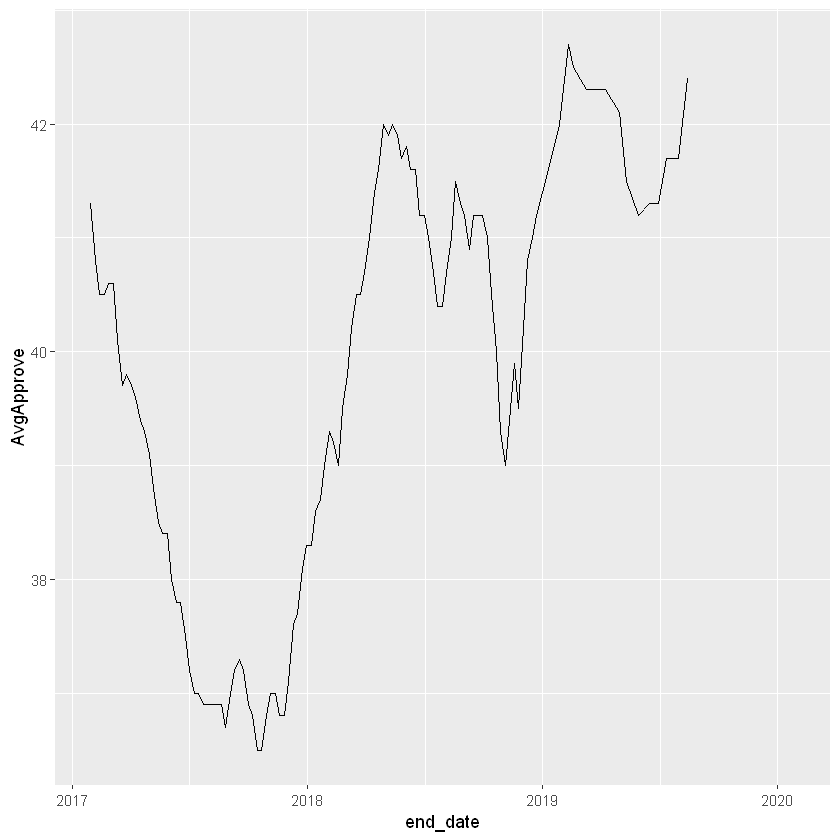

In [4]:
library(zoo)
Avg_tr_app <- approval_trump  %>% 
    mutate(AvgApprove =  rollmean(approving, 10, na.pad = TRUE,
                                 align =  "right"))
library(ggplot2)

ggplot(Avg_tr_app, aes(x = end_date, y = AvgApprove)) +
    geom_line()

## Average job approval by president

In [7]:
approval_mean <- data  %>% 
    group_by(president)  %>% 
    summarize(MeanApproval = mean(approving))
approval_mean

`summarise()` ungrouping output (override with `.groups` argument)



president,MeanApproval
<chr>,<dbl>
Barack Obama,47.88123
Donald Trump,39.91870
Dwight D. Eisenhower,64.16522
Franklin D. Roosevelt,72.30000
George Bush,60.12658
George W. Bush,51.00370
Gerald R. Ford,46.13889
Harry S. Truman,42.09231
Jimmy Carter,46.06593


## Job approval by president over time

Using a rolling average to smooth out day to day changes

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 117 rows containing non-finite values (stat_smooth)."


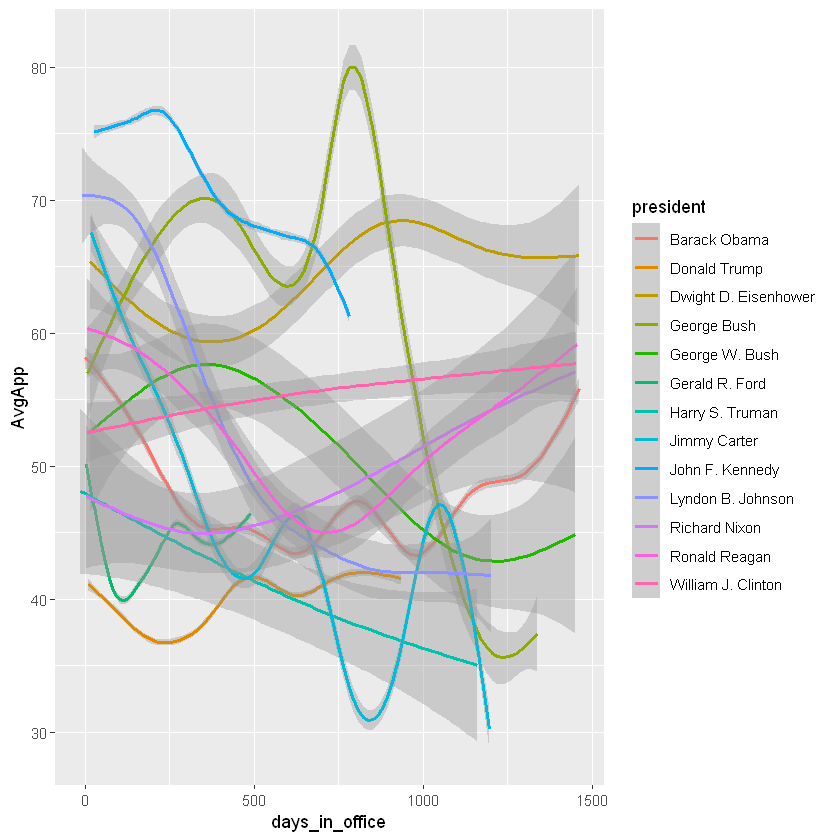

In [14]:
all_app <- data  %>% 
    group_by(president)  %>% 
    filter(president != "Franklin D. Roosevelt") %>% 
    mutate(AvgApp = rollmean(approving, 10, na.pad = T, align = "right"))
ggplot(data = all_app, aes(x = days_in_office, y = AvgApp, col = president)) +
    geom_smooth()